<a href="https://colab.research.google.com/github/AnamayTrivedi/ML_project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***MACHINE LEARNING PROJECT***





This project displays *Multivariate analysis* of dataset on 'Housing Prices' using the ***Linear regresssion algorithm***. It includes: 1.Exploratory Data Analysis 2.Data Visualisation 3.Normalisation(Scaling) 4.Fitting model 5.Predicting output 6.Evaluation

> Indented block



In [1]:
#Importing libraries, always run this first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Reading the dataset and making data-frame
dataset = pd.read_csv('/content/Housing.csv')

# Get information about the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [2]:
#Getting summary statistics
print(dataset.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [3]:
# Checking for duplicate values
duplicate_rows = dataset.duplicated()
print("Duplicate rows:\n", dataset[duplicate_rows])

Duplicate rows:
 Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []


No duplicate values found above.

In [4]:
# Checking for null values
null_values = dataset.isnull().sum()
print("Null values:\n", null_values)

Null values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


No null values found above

In [5]:
# Calculate z-scores for the numerical columns
z_scores = np.abs((dataset - dataset.mean()) / dataset.std())

# Define a threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Store outliers in a dictionary
outliers = {}

# Identify outliers and add them to the dictionary
for column in z_scores.columns:
    outlier_mask = z_scores[column] > threshold
    column_outliers = dataset[outlier_mask][column]
    if not column_outliers.empty:
        outliers[column] = column_outliers.tolist()

# Print the outliers if any are detected
if outliers:
    print("Outliers detected:")
    for column, column_outliers in outliers.items():
        print(f"{column}: {column_outliers}")
else:
    print("No outliers detected.")

# Remove outliers from the dataset
for column, column_outliers in outliers.items():
    dataset = dataset[~dataset[column].isin(column_outliers)]


Outliers detected:
area: [16200, 13200, 13200, 12090, 15600, 12900, 12944]
bathrooms: [4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
bedrooms: [6, 6]
price: [13300000, 12250000, 12250000, 12215000, 11410000, 10850000]


<ipython-input-5-abc94a621604>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((dataset - dataset.mean()) / dataset.std())
<ipython-input-5-abc94a621604>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((dataset - dataset.mean()) / dataset.std())


Thus, outliers were detected and removed

# Data Visualisation

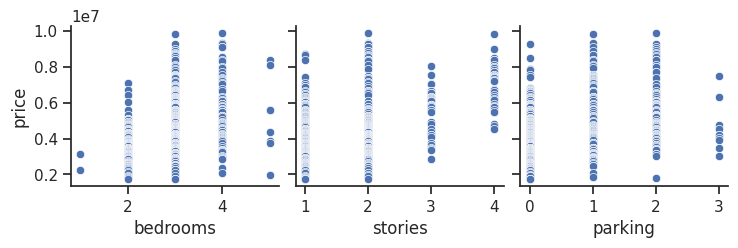

In [6]:
sns.set(style="ticks")

# Pairwise scatter plot
sns.pairplot(dataset, x_vars=['bedrooms', 'stories', 'parking'], y_vars='price', kind='scatter')
plt.show()

The above graph shows distribution of prices for various number of features(scale of y-axis is 1e7)

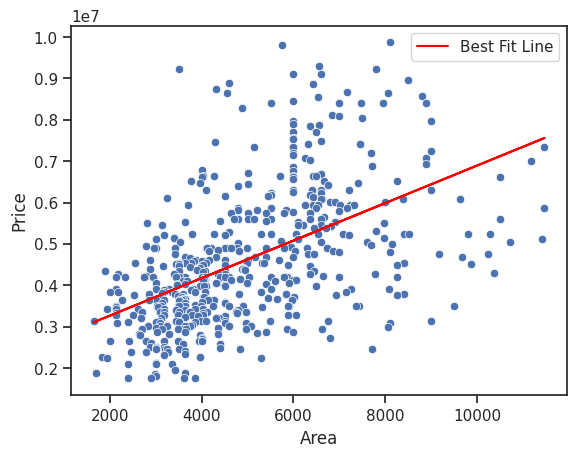


 Correlation coefficient: 0.5263532590635274


In [7]:
# Scatter plot for the variable with bigger values(area)
sns.scatterplot(x='area', y='price', data=dataset)

# Fit a line using linear regression
area = dataset['area']
price = dataset['price']
coefficients = np.polyfit(area, price, 1)
slope = coefficients[0]
intercept = coefficients[1]

# Generate the best fit line
best_fit_line = slope * area + intercept

# Plot the best fit line
plt.plot(area, best_fit_line, color='red', label='Best Fit Line')

# Set labels and legend
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

# Calculate the correlation coefficient
corr_coef = np.corrcoef(area, price)[0, 1]

# Print the correlation coefficient
print("\n Correlation coefficient:", corr_coef)

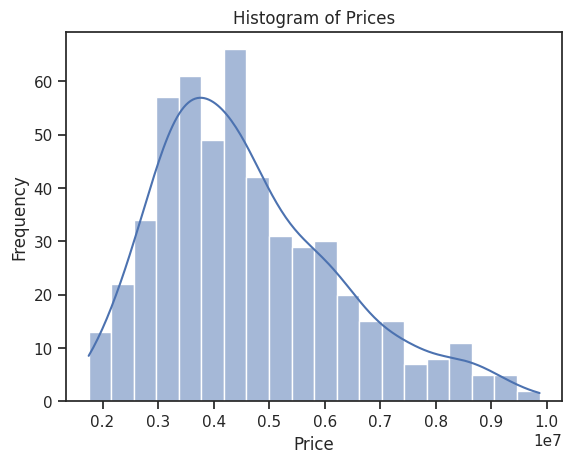

In [8]:
# Plot the histogram using Seaborn
sns.histplot(data=price, kde= True, bins=20,)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices')
plt.show()

# Normalisation(scaling)

In [9]:
# List of columns to process
columns_to_process = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Convert columns to lowercase
for column in columns_to_process:
    dataset[column] = dataset[column].str.lower()

# Assign binary values
for column in columns_to_process:
    dataset[column] = dataset[column].apply(lambda x: 1 if x == "yes" else 0)

# Print the updated dataset
print(dataset)


       price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
8    9870000  8100         4          1        2         1          1   
9    9800000  5750         3          2        4         1          1   
12   9310000  6550         4          2        2         1          0   
13   9240000  3500         4          2        2         1          0   
14   9240000  7800         3          2        2         1          0   
..       ...   ...       ...        ...      ...       ...        ...   
540  1820000  3000         2          1        1         1          0   
541  1767150  2400         3          1        1         0          0   
542  1750000  3620         2          1        1         1          0   
543  1750000  2910         3          1        1         0          0   
544  1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
8           1                0                1      

In the above binary columns, no further normalisation is needed since we have made the values of their elements as 0 and 1

In [10]:
# Defining the desired label assignment for elements in a column
label_mapping = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}

# Assign the encoded values using the label mapping
dataset['furnishing_status_encoded'] = dataset['furnishingstatus'].map(label_mapping)

# Print the updated dataset
print(dataset)


       price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
8    9870000  8100         4          1        2         1          1   
9    9800000  5750         3          2        4         1          1   
12   9310000  6550         4          2        2         1          0   
13   9240000  3500         4          2        2         1          0   
14   9240000  7800         3          2        2         1          0   
..       ...   ...       ...        ...      ...       ...        ...   
540  1820000  3000         2          1        1         1          0   
541  1767150  2400         3          1        1         0          0   
542  1750000  3620         2          1        1         1          0   
543  1750000  2910         3          1        1         0          0   
544  1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
8           1                0                1      

The furnishingstatus column has been label encoded to assign numerical values to it's elements. Now we normalise few features.

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to normalize
columns_to_normalize = ['area', 'bedrooms', 'bathrooms', 'parking', 'stories', 'furnishing_status_encoded']

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])

# Print the normalized dataset
print(dataset)


       price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
8    9870000  0.657492      0.75        0.0  0.333333         1          1   
9    9800000  0.417941      0.50        1.0  1.000000         1          1   
12   9310000  0.499490      0.75        1.0  0.333333         1          0   
13   9240000  0.188583      0.75        1.0  0.333333         1          0   
14   9240000  0.626911      0.50        1.0  0.333333         1          0   
..       ...       ...       ...        ...       ...       ...        ...   
540  1820000  0.137615      0.25        0.0  0.000000         1          0   
541  1767150  0.076453      0.50        0.0  0.000000         0          0   
542  1750000  0.200815      0.25        0.0  0.000000         1          0   
543  1750000  0.128440      0.50        0.0  0.000000         0          0   
544  1750000  0.224261      0.50        0.0  0.333333         1          0   

     basement  hotwaterheating  airconditioning   parking  pref

# Dividing into input and output

In [12]:
# Define the columns to exclude from features and the target column
exclude_columns = ['price', 'furnishingstatus']
target_column = 'price'

# Assign the remaining columns as features
X = dataset.drop(columns=exclude_columns)

# Assign the target column as the target variable
y = dataset[target_column]

# Print the features and target
print("Features:")
print(X)
print("\nTarget:")
print(y)


Features:
         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
8    0.657492      0.75        0.0  0.333333         1          1         1   
9    0.417941      0.50        1.0  1.000000         1          1         0   
12   0.499490      0.75        1.0  0.333333         1          0         0   
13   0.188583      0.75        1.0  0.333333         1          0         0   
14   0.626911      0.50        1.0  0.333333         1          0         0   
..        ...       ...        ...       ...       ...        ...       ...   
540  0.137615      0.25        0.0  0.000000         1          0         1   
541  0.076453      0.50        0.0  0.000000         0          0         0   
542  0.200815      0.25        0.0  0.000000         1          0         0   
543  0.128440      0.50        0.0  0.000000         0          0         0   
544  0.224261      0.50        0.0  0.333333         1          0         0   

     hotwaterheating  airconditioning   p

# Training and Testing

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (417, 12) (417,)
Testing set shape: (105, 12) (105,)


# Fitting model

In [14]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
regressor = LinearRegression()

# Fit the model using the training data
regressor.fit(X_train, y_train)

# Print the coefficients and intercept of the linear regression model
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)



Coefficients: [2355914.79473699  384957.57544119  803647.3772045  1414118.87299185
  375374.60944403  500802.6273404   215564.5527833   685806.50410283
  756577.39514241  578406.08297734  418953.93791189  399842.1331903 ]
Intercept: 1909131.2713524532


# Performing predictions

      Actual     Predicted
456  3118850  3.275495e+06
462  3080000  3.110947e+06
16   9100000  7.121709e+06
202  4900000  3.582214e+06
92   6405000  7.108459e+06
..       ...           ...
362  3710000  3.356958e+06
434  3290000  3.758929e+06
321  4025000  5.498842e+06
450  3150000  3.796121e+06
170  5250000  4.620712e+06

[105 rows x 2 columns]


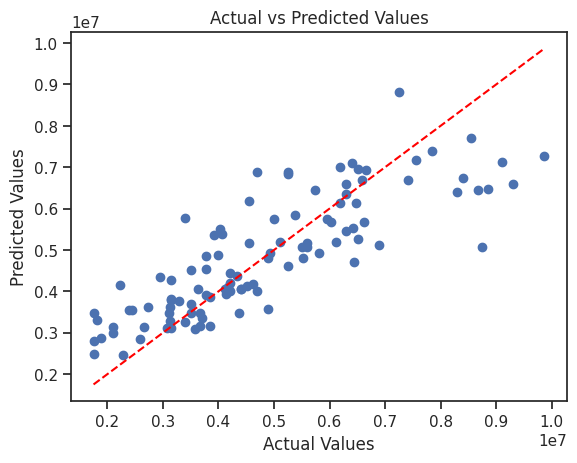


Correlation Coefficient (r value): 0.8278050517744979


In [15]:
# Generate predictions for the testing data
y_pred = regressor.predict(X_test)

# Compare predicted values with actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the comparison dataframe
print(comparison)

# Plotting the predicted vs actual values
plt.scatter(y_test, y_pred)

# Plotting line for comparison
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Calculate the correlation coefficient (r value)
correlation_coefficient = np.corrcoef(y_test, y_pred)[0, 1]
print("\nCorrelation Coefficient (r value):", correlation_coefficient)


# Other evaluations

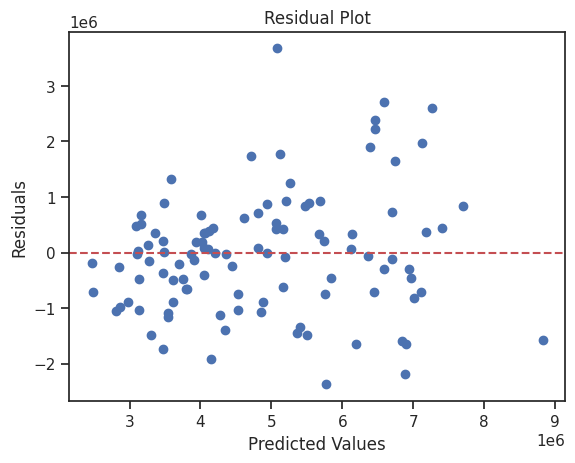

In [16]:
#Residual analysis
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The above plot shows an unbiased prediction since the residual plot evenly scattered along the y=0 line. This can be shown by an almost bell-curve looking graph of histogram of residuals that shows most residuals are close to zero and predicted values are close to actual values.

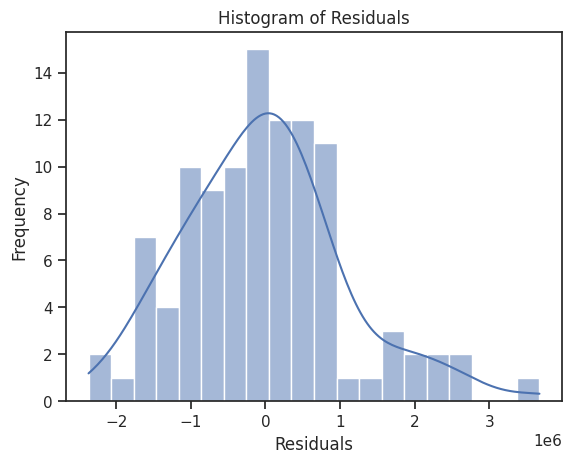

In [17]:
sns.histplot(data=residuals, kde= True, bins=20,)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)
print("R-squared (Coefficient of Determination):", r_squared)


Mean Squared Error (MSE): 1181602783768.243
Root Mean Squared Error (RMSE): 1087015.5398007163
R-squared (Coefficient of Determination): 0.6769717154820072


To reduce errors, we explore other options

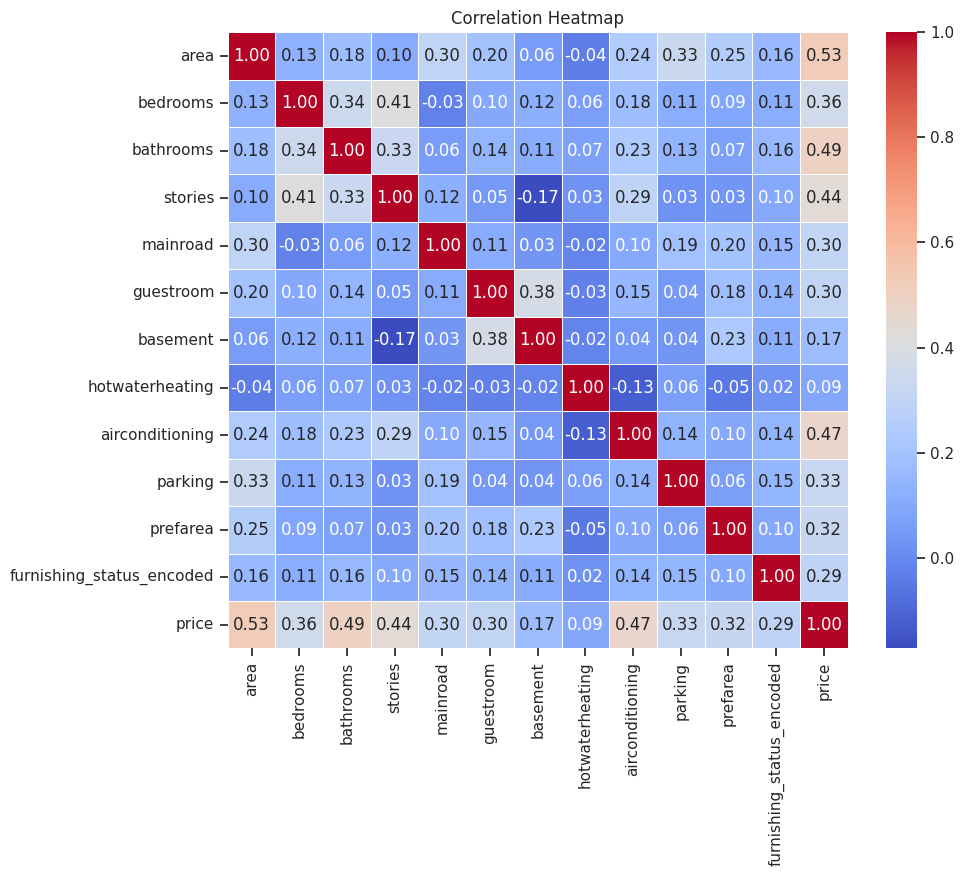

In [19]:
# Concatenate features (X) and target (y) DataFrames
all_variables = pd.concat([X, y], axis=1)

# Compute the correlation matrix
correlation_matrix = all_variables.corr()

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


From heatmap, we can see that the features are not closely corelated to each other eliminating any possible multicollinearity issues, thus Ridge and Lasso regression will not improve the results.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

best_degrees = {}  # Dictionary to store the best degree for each feature
for feature in X_train.columns:
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]

    best_degree = 1  # Default is linear regression
    best_rmse = np.sqrt(mse)
    for degree in [2, 3, 4]:
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(X_train_feature)
        X_test_poly = poly_features.transform(X_test_feature)

        poly_regressor = LinearRegression()
        poly_regressor.fit(X_train_poly, y_train)
        y_pred_poly = poly_regressor.predict(X_test_poly)
        mse_poly = mean_squared_error(y_test, y_pred_poly)
        rmse_poly = np.sqrt(mse_poly)

        if rmse_poly < best_rmse:
            best_rmse = rmse_poly
            best_degree = degree

    best_degrees[feature] = best_degree
    print(f"Best degree for {feature}: {best_degree}, RMSE: {best_rmse}")


Best degree for area: 1, RMSE: 1087015.5398007163
Best degree for bedrooms: 1, RMSE: 1087015.5398007163
Best degree for bathrooms: 1, RMSE: 1087015.5398007163
Best degree for stories: 1, RMSE: 1087015.5398007163
Best degree for mainroad: 1, RMSE: 1087015.5398007163
Best degree for guestroom: 1, RMSE: 1087015.5398007163
Best degree for basement: 1, RMSE: 1087015.5398007163
Best degree for hotwaterheating: 1, RMSE: 1087015.5398007163
Best degree for airconditioning: 1, RMSE: 1087015.5398007163
Best degree for parking: 1, RMSE: 1087015.5398007163
Best degree for prefarea: 1, RMSE: 1087015.5398007163
Best degree for furnishing_status_encoded: 1, RMSE: 1087015.5398007163
